In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 11

import all the function needed to compute *potential*, *transformations*, *velocity fields* and *plots*

In [3]:
from conformal_mapping import *

# Joukowski Transformation

The Joukowski transformation is defined by the formula:

$$z = \zeta + \frac{c^2}{\zeta^2}$$

where the point $(c,0)$ is the critical point in which $w(\zeta)=0$ must be enforced.

The point $\zeta_0$ is the center of the cylinder. As the cylinder must pass through $(c,0)$ the radius, in complex coodinates is defined by:

$$Re^{i\beta} = \zeta_0 - c$$

Properties of $\zeta_0$:

- if $\zeta_0 = (0,0)$ : the circle becomes (under transformation) a **flat plate**
- if $\zeta_0 = i\delta$ : the circle becomes an **arc**
- if $\zeta_0 = -x_0$: the circle becomes a **symmetric airfoil**
- if $\zeta_0 = -x_0+i y_0$: the circle becomes a **cambered airfoil**

We define first the parameter and plot the transofrmation

In [4]:
# flat plate
#ζ0 = 0

# arc
#ζ0 = 1j*0.2

# symmetric airfoil
ζ0 = -0.1

# cambered airfoil
#ζ0 = -0.1+1j*0.05

#critical point
c0 = 1

a_c = c0-ζ0
a0 = np.abs(a_c)
β0 = np.angle(a_c)

In [5]:
θ0 = np.linspace(0,2*np.pi,num=250)
ζ_c0 = ζ0 + a0*np.exp(1j*θ0)

## Plot of the transofmation

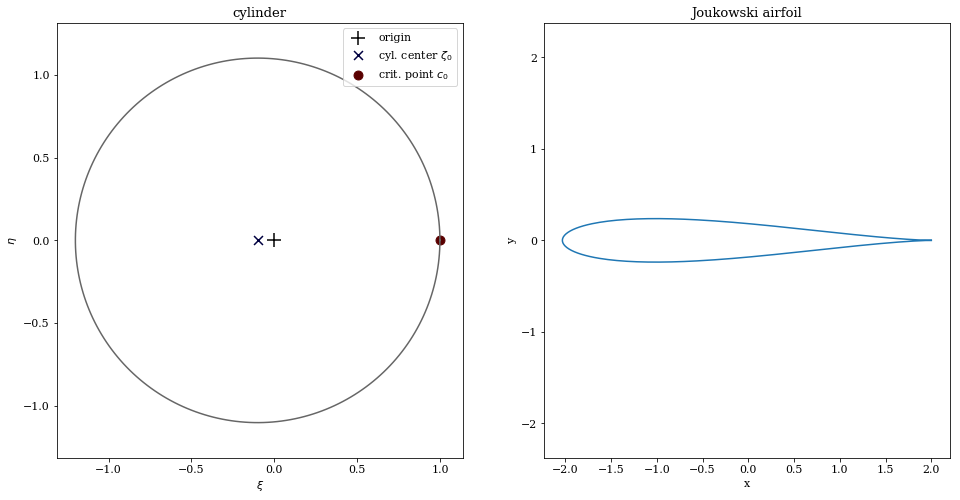

In [6]:
plot_cyl_airfoil(ζ_c0,c0,ζ0)

We define a region where to compute the **velocity potential**

In [7]:
ξ1 = np.linspace(-5,5,250)
η1 = np.linspace(-5,5,250)

ξ, _ = np.meshgrid(ξ1,η1)
η = np.transpose(ξ)

ζ = ξ +1j*η

## Freestream

The freestream velocity is characterized by a module and a direction

$$U_{\infty} = U_0 e^{-i\alpha_0}$$

In [8]:
α0 = np.deg2rad(10.)
U0 = 1

## Cylinder circulation

we need to impose a circulation $\Gamma$ such that the *rear stagnation point* coincides with the *critical point* $c_0$:

$$\Gamma = -4\pi U_0 R \sin(\alpha_0 - \beta)$$

In [9]:
Γ0 = Gamma(U0,a0,α0,β0)

# Potential and velocity fields:

## cylinder

The **velocity potential** around the cylinder is defined by:

$$f(\zeta) = U_0 e^{-i\alpha_0}\zeta -i\frac{\Gamma}{2\pi}\log(\zeta-\zeta_0) + \frac{U_0 R^2}{\zeta-\zeta_0}e^{i\alpha_0}$$

The **complex velocity**:

$$w_c(\zeta) = \frac{df}{d\zeta} =  U_0 e^{-i\alpha_0}-i\frac{\Gamma}{2\pi(\zeta-\zeta_0)}- \frac{U_0 R^2}{(\zeta-\zeta_0)^2}e^{i\alpha_0}$$

## airfoil

The **potential field** around the airfoil is such that:

$$F(z(\zeta) = f(\zeta)$$

The **complex velocity**:

$$w_a(z) = \frac{dF(z)}{dz} = \frac{dF(z(\zeta))}{d\zeta} \cdot \frac{d\zeta}{dz} = \frac{w_c}{\frac{dz}{d\zeta}}$$

In [10]:
Fc1 = cylinder_potential(ζ, ζ0, U0, Γ0, a0, α0)
wc1 = cylinder_velocity(ζ, ζ0, U0, Γ0, a0, α0)
wa1 = airfoil_velocity(ζ, ζ0, U0, Γ0, a0, α0,c0)

We can plot the **stream function** $\Psi = \Im(f)$ and the velocity field around the cylinder

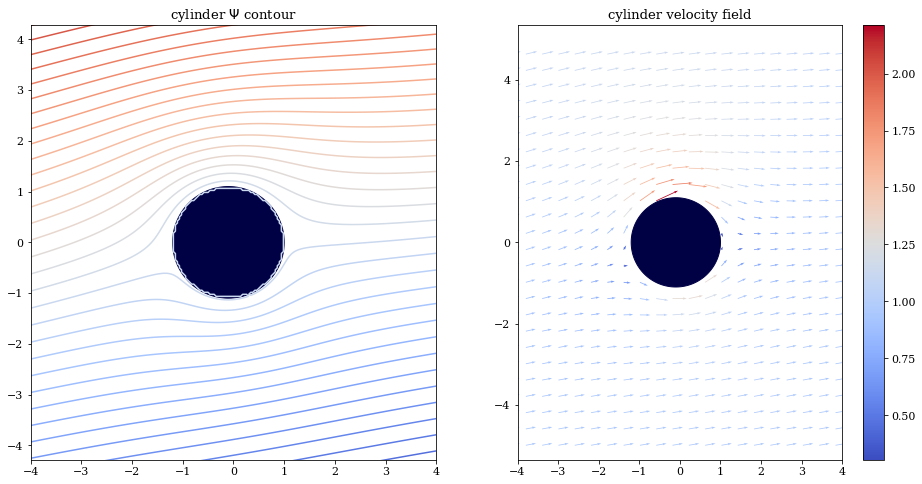

In [11]:
plot_stream(ζ,Fc1,wc1,ζ_c0,lv=40,kst=10,sc=30,border=4)

After transforming the coordinate $\zeta$ into $z$ we can plot the **stream function** $\Psi = \Im(F(z(\zeta))$

In [12]:
z = joukowsky_transform(ζ,c0)
z_airfoil = joukowsky_transform(ζ_c0,c0)



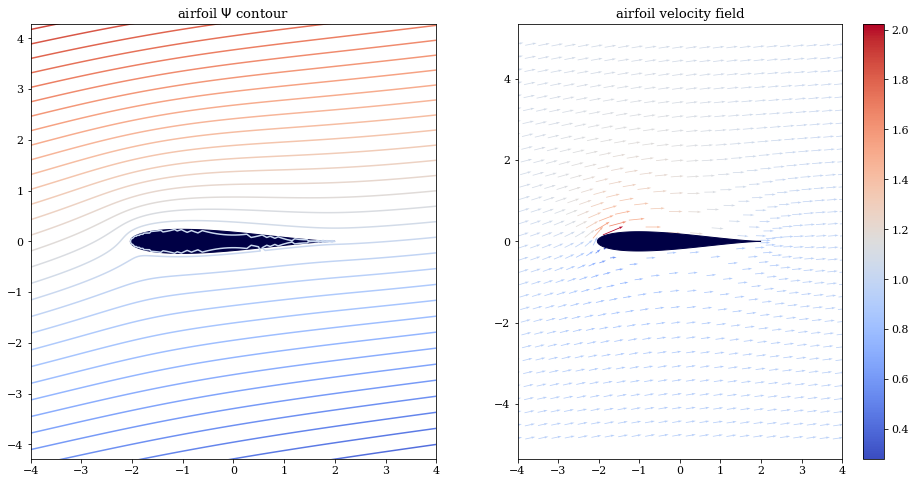

In [13]:
plot_stream(z,Fc1,wa1,z_airfoil,lv=40,kst=8, border=4,sc=30,nm='airfoil')

# Pressure coefficient

The velocity field around the cylinder and the airfoil are known, so, by using the Bernoulli equation we can compute the **pressure coefficient** $C_p$ around the cylinder and the airfoil

$$ C_p = 1 - \left( \frac{|w|}{U_0}  \right)^2$$

In [14]:
Cp_c = Cp_contour(wc1,U0)
Cp_a = Cp_contour(wa1,U0)

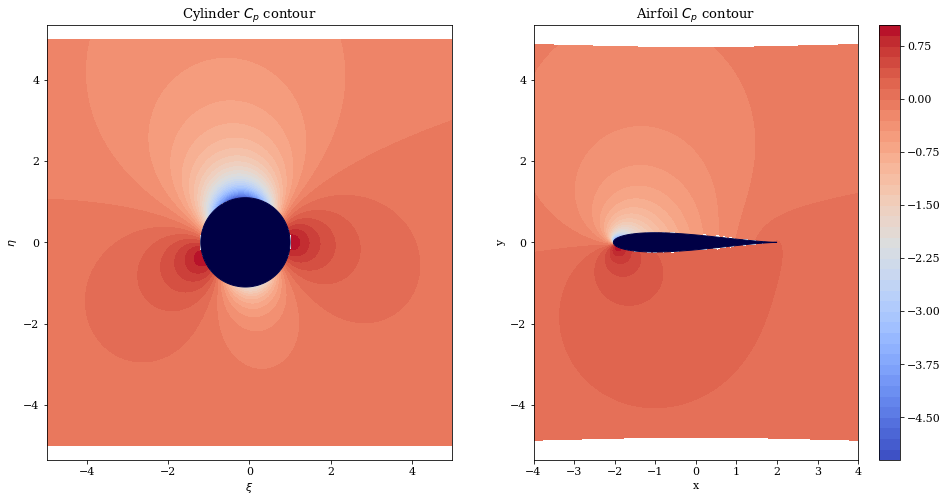

In [15]:
plot_Cp_contour(ζ,ζ_c0,Cp_c,z,z_airfoil,Cp_a,lv=40,border=4)

## Pressure coefficient on the surface:

We can finally plot the pressure coefficient around the upper and lower contours of the cylinder and the airfoil

In [16]:
cyl_up, cyl_down, af_up, af_down = compute_Cp(ζ0, U0, Γ0, a0, α0,c0,β0, 200)

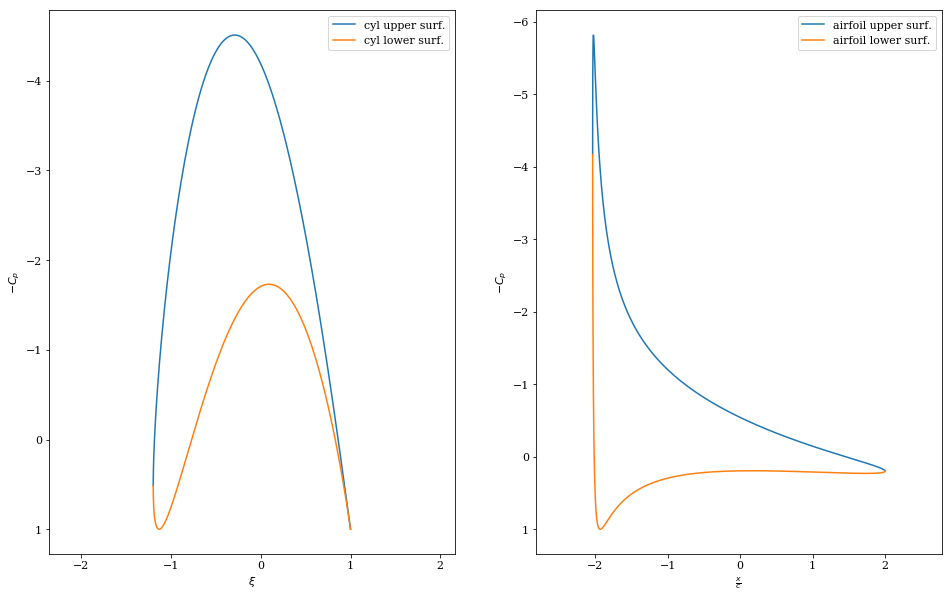

In [17]:
plot_Cp_surface(cyl_up, cyl_down, af_up, af_down)

# Karman Treffz transformation

In [18]:

αKT = np.deg2rad(25.)
z_kt = KT_transform(ζ_c0, αKT)


In [19]:
# flat plate
#ζ1 = 0

# arc
#ζ1 = 1j*0.2

# symmetric airfoil
ζ1 = -0.1

# cambered airfoil
#ζ0 = -0.1+1j*0.05

#critical point
c1 = 1

a_c = c1-ζ1
a1 = np.abs(a_c)
β1 = np.angle(a_c)

In [20]:
θ1 = np.linspace(0,2*np.pi,num=250)
ζ_c1 = ζ1 + a1*np.exp(1j*θ1)

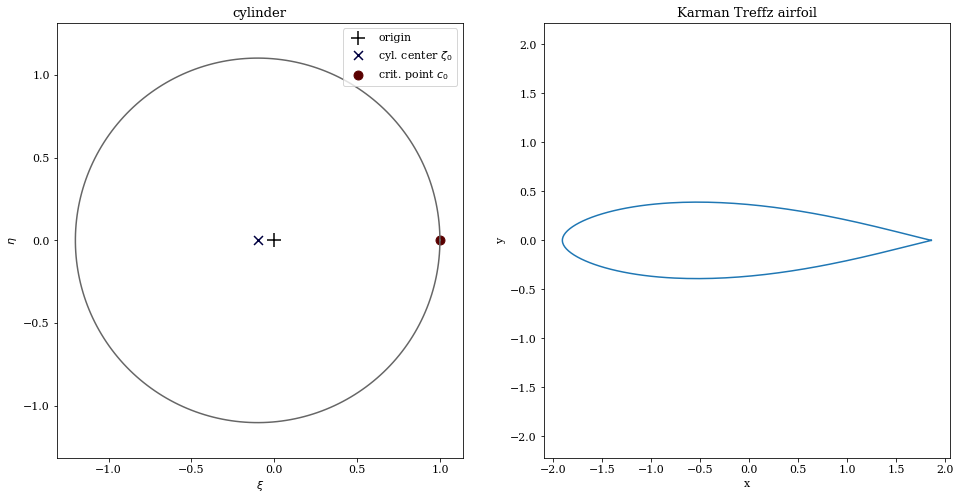

In [21]:
plot_cyl_airfoil(ζ_c1,c1,ζ1,αKT,False)

In [22]:
α1 = np.deg2rad(10.)
U1 = 1

In [23]:
Γ1 = Gamma(U1,a1,α1,β1)

In [24]:
Fc11 = cylinder_potential(ζ, ζ1, U1, Γ1, a1, α1)
wc11 = cylinder_velocity(ζ, ζ1, U1, Γ1, a1, α1)
waKT = airfoil_velocity_KT(ζ, ζ1, U1, Γ1, a1, α1,αKT)

In [25]:
#plot_stream(ζ,Fc11,wc11,ζ_c1,lv=40,kst=10,sc=30,border=4)

In [26]:
zKT = KT_transform(ζ,αKT)
z_aKT = KT_transform(ζ_c1,αKT)

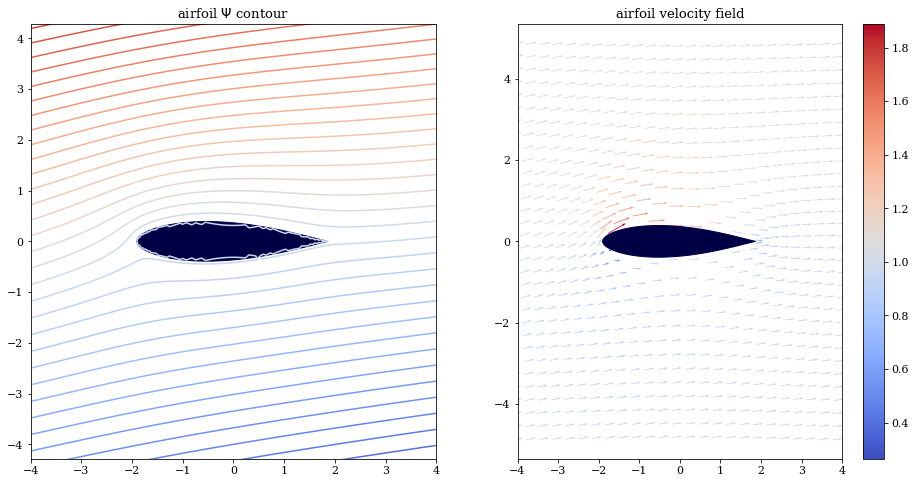

In [27]:
plot_stream(zKT,Fc11,waKT,z_aKT,lv=40,kst=8, border=4,sc=30,nm='airfoil')

In [28]:
Cp_cKT = Cp_contour(wc11,U1)
Cp_aKT = Cp_contour(waKT,U1)

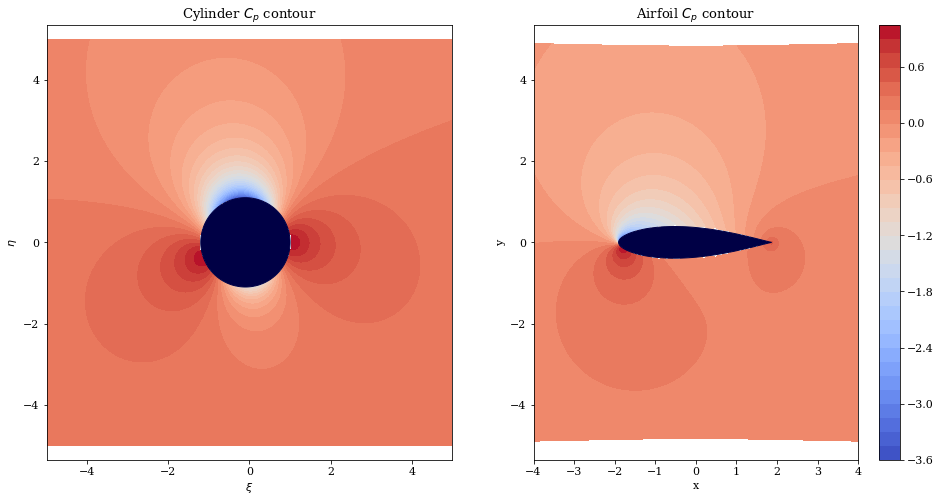

In [29]:
plot_Cp_contour(ζ,ζ_c1,Cp_cKT,zKT,z_aKT,Cp_aKT,lv=40,border=4)

In [30]:
cyl_up, cyl_down, af_up, af_down = compute_Cp_KT(ζ1, U1, Γ1, a1, α1,αKT,β1, 200)

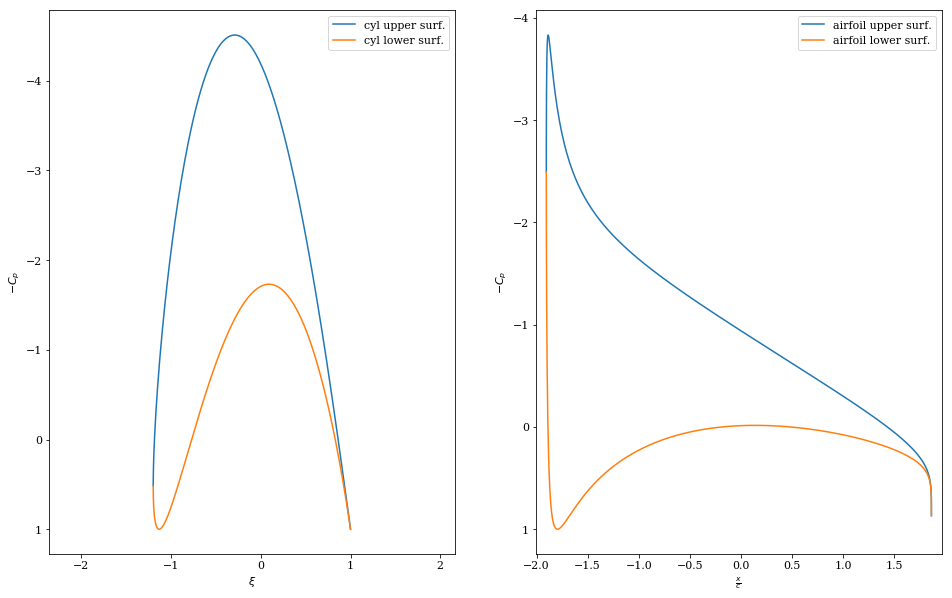

In [31]:
plot_Cp_surface(cyl_up, cyl_down, af_up, af_down)